In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from imblearn.combine import SMOTETomek
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("./trainKNN.txt",names=["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca" ,"Ba", "Fe","target"])

In [3]:
df_test=pd.read_csv("./testKNN.txt",names=["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca" ,"Ba", "Fe","target"])

In [4]:
df.head(4)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1


In [5]:
print("The number of rows and columns are ",df.shape)

The number of rows and columns are  (196, 11)


In [6]:
df.isna().sum()

Id        0
RI        0
Na        0
Mg        0
Al        0
Si        0
K         0
Ca        0
Ba        0
Fe        0
target    0
dtype: int64

In [7]:
# The datasets is clean

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      196 non-null    int64  
 1   RI      196 non-null    float64
 2   Na      196 non-null    float64
 3   Mg      196 non-null    float64
 4   Al      196 non-null    float64
 5   Si      196 non-null    float64
 6   K       196 non-null    float64
 7   Ca      196 non-null    float64
 8   Ba      196 non-null    float64
 9   Fe      196 non-null    float64
 10  target  196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 17.0 KB


In [9]:
df=df.drop("Id",axis=1) # id columns is useless
df_test=df_test.drop("Id",axis=1)

In [10]:
df_test.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
0,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [48]:
def scatter(feature1,feature2):
    sns.scatterplot(x=df[feature1],y=df[feature2],hue=df["target"],palette="bright")
    plt.show()

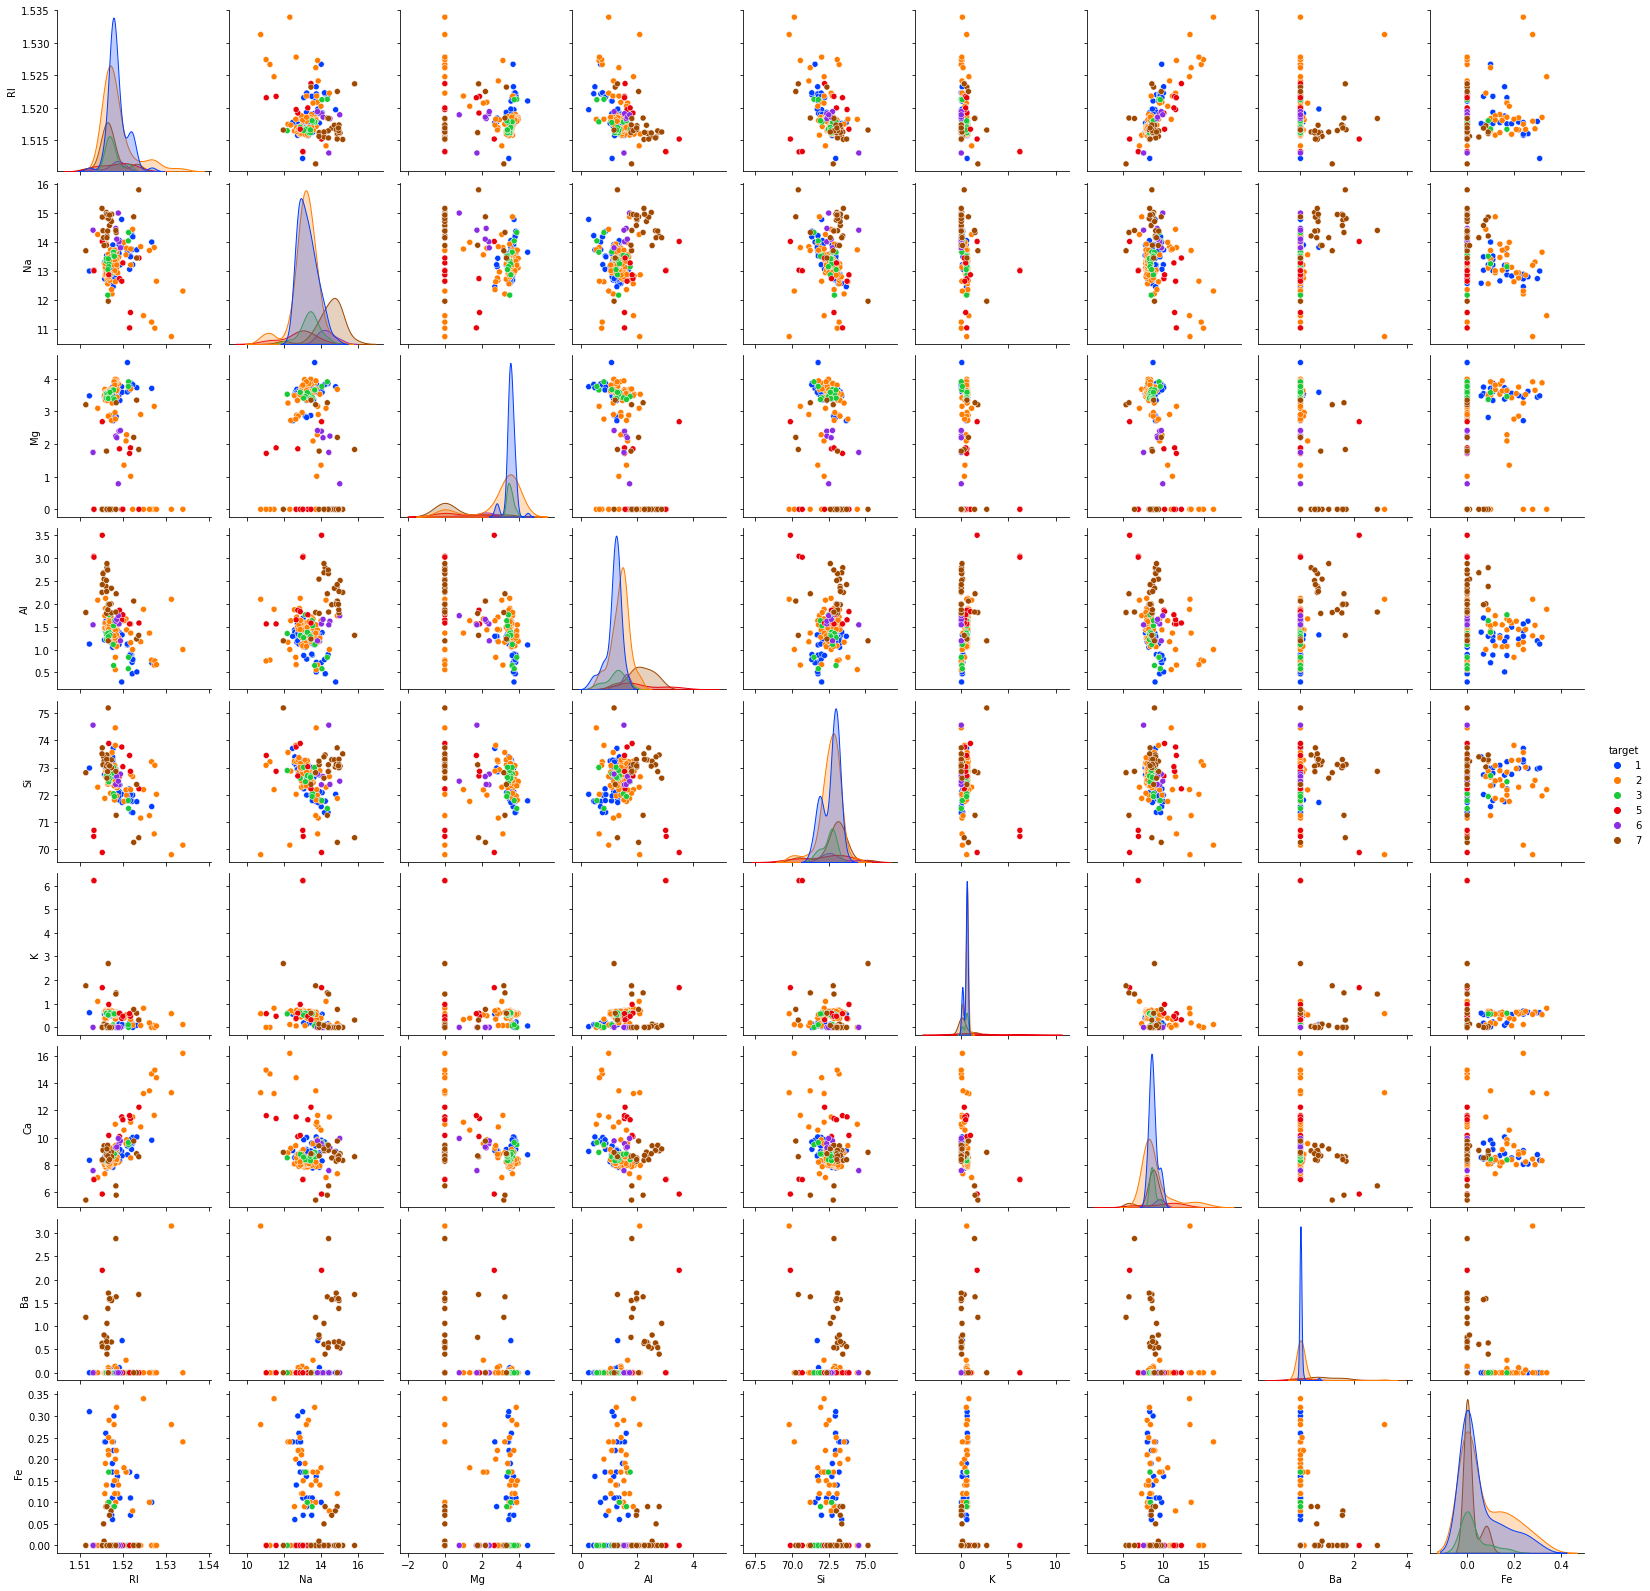

In [11]:
sns.pairplot(data=df,palette="bright",hue="target")
# scatter("RI","Na")

In [ ]:
# since 6 classses are there the plot plot is messy to us

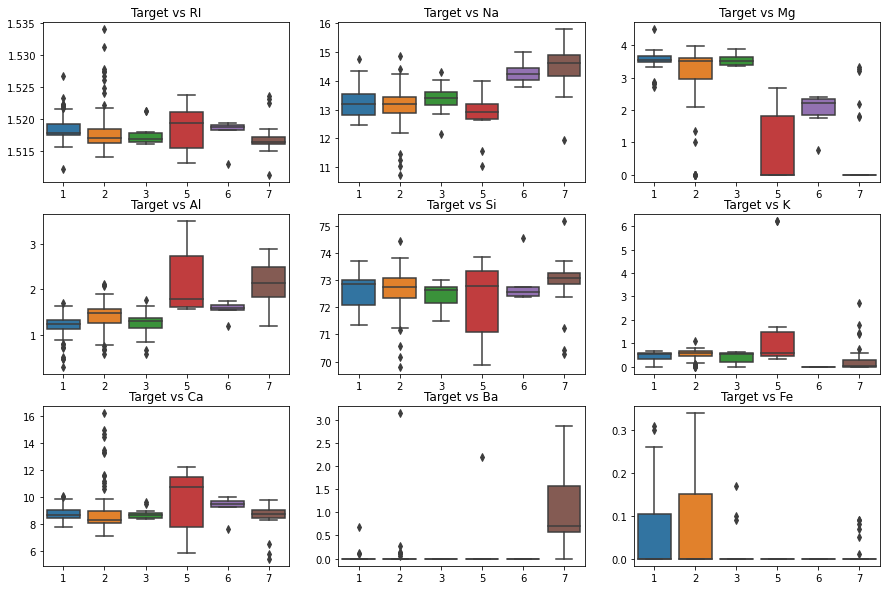

In [12]:
j=0
plt.figure(figsize=(15,10))
for i in df.drop("target",axis=1).columns:
    plt.subplot(3,3,j+1)
    sns.boxplot(df["target"],df[i]).set(xlabel=None,ylabel=None)
    plt.title(f"Target vs {i}")
    j+=1
plt.show()

In [ ]:
# Iron is present only in glass type 1 and 2

# barium is present only in type 7 it is predict type 7 by checking barium content

# potassium is not present in glass type 6 


In [13]:
x_train=df.drop("target",axis=1)
y_train=df["target"]

In [14]:
x_test=df_test.drop("target",axis=1)
y_test=df_test["target"]

In [15]:
minmax=MinMaxScaler()
minmax.fit(x_train)

x_train_scaled=minmax.fit_transform(x_train)

x_test_scaled=minmax.fit_transform(x_test)

In [16]:
y_train.value_counts()

2    73
1    67
7    26
3    14
5    10
6     6
Name: target, dtype: int64

In [17]:
scores1=[]
test_score1=[]
for i in range(2,11):
    knn=KNeighborsClassifier(n_neighbors=i, metric="euclidean")
    knn.fit(x_train_scaled,y_train)
    scores1.append(cross_val_score(knn,x_train_scaled,y_train,cv=10).mean())
    test_score1.append(knn.score(x_test_scaled,y_test))

In [18]:
scores2=[]
test_score2=[]
for i in range(2,11):
    knn=KNeighborsClassifier(n_neighbors=i, metric="manhattan")
    knn.fit(x_train_scaled,y_train)
    scores2.append(cross_val_score(knn,x_train_scaled,y_train,cv=10).mean())
    test_score2.append(knn.score(x_test_scaled,y_test))

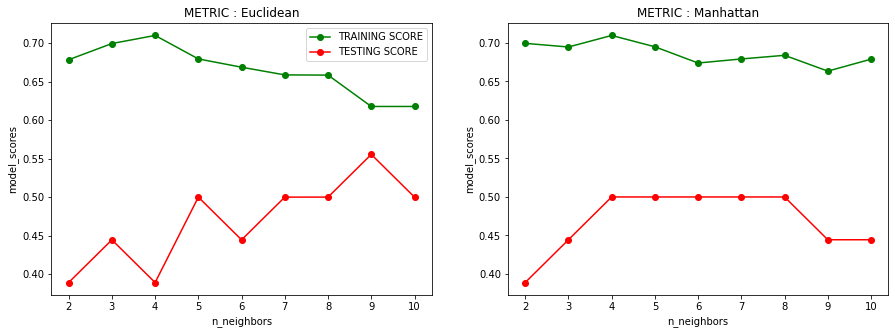

In [19]:
plt.figure(figsize=(15,5))
plt.title("BEFORE TREATING IMBALANCE")
plt.subplot(1,2,1)
plt.plot(range(2,11),scores1,marker="o",color="green",label="TRAINING SCORE")
plt.plot(range(2,11),test_score1,marker="o",color="red",label="TESTING SCORE")
plt.title("METRIC : Euclidean")
plt.xlabel("n_neighbors")
plt.ylabel("model_scores")
plt.legend()
# plt.show()
plt.subplot(1,2,2)
plt.plot(range(2,11),scores2,marker="o",color="green",label="TRAINING SCORE")
plt.plot(range(2,11),test_score2,marker="o",color="red",label="TESTING SCORE")
plt.title("METRIC : Manhattan")
plt.xlabel("n_neighbors")
plt.ylabel("model_scores")
plt.show()

In [24]:
knn=KNeighborsClassifier(n_neighbors=9, metric="euclidean")
knn.fit(x_train_scaled,y_train)
# plot_roc_curve(knn,x_test_scaled,y_test)
# plt.show()
print("THE TRAINING SCORE FOR EUCLIDEAN METRIC :",round(cross_val_score(knn,x_train_scaled,y_train,cv=10).mean(),2))
print("THE TESTING SCORE FOR EUCLIDEAN METRIC :",round(knn.score(x_test_scaled,y_test),2))


print("------------------------------------------------------------------")


knn=KNeighborsClassifier(n_neighbors=6, metric="manhattan")
knn.fit(x_train_scaled,y_train)
# plot_roc_curve(knn,x_test_scaled,y_test)
# plt.show()
print("THE TRAINING SCORE FOR MANHATTAN METRIC :",round(cross_val_score(knn,x_train_scaled,y_train,cv=10).mean(),2))
print("THE TESTING SCORE FOR MANHATTAN METRIC :",round(knn.score(x_test_scaled,y_test),2))

THE TRAINING SCORE FOR EUCLIDEAN METRIC : 0.62
THE TESTING SCORE FOR EUCLIDEAN METRIC : 0.56
------------------------------------------------------------------
THE TRAINING SCORE FOR MANHATTAN METRIC : 0.67
THE TESTING SCORE FOR MANHATTAN METRIC : 0.5


In [25]:
# TReating the imbalance 

In [26]:
st=SMOTETomek(sampling_strategy="not majority")
final_x,final_y=st.fit_resample(x_train_scaled,y_train)

In [27]:
final_y.value_counts()

3    73
5    73
6    73
7    72
1    70
2    69
Name: target, dtype: int64

In [28]:
scores1=[]
test_score1=[]
for i in range(2,11):
    knn=KNeighborsClassifier(n_neighbors=i, metric="euclidean")
    knn.fit(final_x,final_y)
    scores1.append(cross_val_score(knn,final_x,final_y,cv=10).mean())
    test_score1.append(knn.score(x_test_scaled,y_test))
    
scores2=[]
test_score2=[]
for i in range(2,11):
    knn=KNeighborsClassifier(n_neighbors=i, metric="manhattan")
    knn.fit(final_x,final_y)
    scores2.append(cross_val_score(knn,final_x,final_y,cv=10).mean())
    test_score2.append(knn.score(x_test_scaled,y_test))

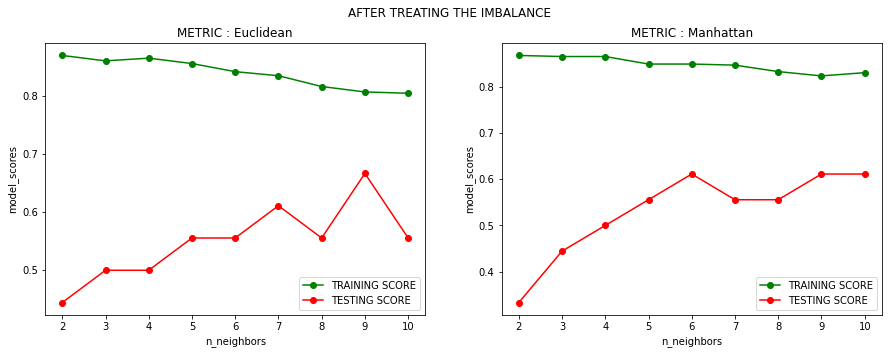

In [29]:
plt.figure(figsize=(15,5))
plt.suptitle("AFTER TREATING THE IMBALANCE")
plt.subplot(1,2,1)
plt.plot(range(2,11),scores1,marker="o",color="green",label="TRAINING SCORE")
plt.plot(range(2,11),test_score1,marker="o",color="red",label="TESTING SCORE")
plt.title("METRIC : Euclidean")
plt.xlabel("n_neighbors")
plt.ylabel("model_scores")
plt.legend()
# plt.show()
plt.subplot(1,2,2)
plt.plot(range(2,11),scores2,marker="o",color="green",label="TRAINING SCORE")
plt.plot(range(2,11),test_score2,marker="o",color="red",label="TESTING SCORE")
plt.title("METRIC : Manhattan")
plt.xlabel("n_neighbors")
plt.ylabel("model_scores")
plt.legend()
plt.show()

In [30]:
knn=KNeighborsClassifier(n_neighbors=9, metric="euclidean")
knn.fit(final_x,final_y)
print("THE TRAINING SCORE FOR EUCLIDEAN METRIC :",round(cross_val_score(knn,final_x,final_y,cv=10).mean(),2))
print("THE TESTING SCORE FOR EUCLIDEAN METRIC :",round(knn.score(x_test_scaled,y_test),2))
print("------------------------------------------------------------------")
knn=KNeighborsClassifier(n_neighbors=6, metric="manhattan")
knn.fit(final_x,final_y)
print("THE TRAINING SCORE FOR MANHATTAN METRIC :",round(cross_val_score(knn,final_x,final_y,cv=10).mean(),2))
print("THE TESTING SCORE FOR MANHATTAN METRIC :",round(knn.score(x_test_scaled,y_test),2))

THE TRAINING SCORE FOR EUCLIDEAN METRIC : 0.81
THE TESTING SCORE FOR EUCLIDEAN METRIC : 0.67
------------------------------------------------------------------
THE TRAINING SCORE FOR MANHATTAN METRIC : 0.85
THE TESTING SCORE FOR MANHATTAN METRIC : 0.61


In [ ]:
# The varince is high in 